<a href="https://colab.research.google.com/github/shubhammittal009/ml_cb/blob/master/Pokedex_(Pokemon_Classifier)_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install kaggle

In [0]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (2).json


{'kaggle.json': b'{"username":"shubhammittal009","key":"5547f8eeda289d88b258415db595169b"}'}

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# Changing the permission
!chmod 600 ~/.kaggle/kaggle.json

In [0]:
!kaggle datasets download -d thedagger/pokemon-generation-one --force

 99% 1.07G/1.08G [00:22<00:00, 92.6MB/s]
100% 1.08G/1.08G [00:22<00:00, 50.6MB/s]


In [0]:
from zipfile import ZipFile
file_name = "pokemon-generation-one.zip"

with ZipFile(file_name, 'r') as zip:
    zip.extractall()
    print('Done')

Done


In [0]:
import os
from pathlib import Path
from keras.preprocessing import image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Input,Convolution2D,MaxPooling2D,Flatten,Dense,Dropout
from keras.utils import np_utils
import tensorflow

In [0]:
# Mapping of pokemon name with a index

p = Path("/content/dataset/")

dirs = p.glob("*")

labels_dict = {}

i = 0

for folder_dir in dirs:
    label = str(folder_dir).split("/")[-1]
    labels_dict[label] = i
    i=i+1

In [0]:
# Reverse Mapping of Pokemon Labels with Indexes

label2pokemon = {val: key for key, val in labels_dict.items()}

In [0]:
print(len(labels_dict))

151


In [0]:
p = Path("/content/dataset/")

dirs = p.glob("*")

image_data = []
labels = []

i = 0

image_paths = []

for folder_dir in dirs:
    label = str(folder_dir).split("/")[-1]
    
    cnt = 0
    print(label,end=" images = ")
#     print(folder_dir)
    
#     Iterate over folder_dir and pick all images of the pokemon
    for img_path in folder_dir.glob("*.jpg"):
        img = image.load_img(img_path,target_size=(100,100))
        img_array = image.img_to_array(img)
        image_data.append(img_array)
        
        labels.append(labels_dict[label])
        cnt += 1
        
    print(cnt)

Psyduck images = 158
Butterfree images = 66
Farfetchd images = 64
Seel images = 61
Zubat images = 49
Squirtle images = 186
Abra images = 41
Weezing images = 63
Hypno images = 62
Kingler images = 68
Pinsir images = 63
Staryu images = 60
Kakuna images = 67
Vileplume images = 67
Seaking images = 65
Mew images = 67
Gyarados images = 67
Magnemite images = 60
Slowbro images = 63
Raticate images = 70
Starmie images = 59
Shellder images = 81
Weedle images = 59
Charmander images = 200
Dratini images = 107
Primeape images = 69
Pidgey images = 74
Cloyster images = 59
Metapod images = 65
Nidoking images = 68
Bulbasaur images = 174
Mankey images = 71
Moltres images = 62
Exeggcute images = 57
Wartortle images = 61
Aerodactyl images = 97
Pidgeotto images = 63
Electabuzz images = 53
Jigglypuff images = 64
Onix images = 64
Electrode images = 67
Doduo images = 48
Kabuto images = 56
Alakazam images = 48
Dewgong images = 66
Omastar images = 56
Kangaskhan images = 62
Jynx images = 58
Oddish images = 66
Fea

## Visualisation

In [0]:
print(len(image_data))
print(len(labels))

10118
10118


In [0]:
X = np.array(image_data)
Y = np.array(labels)

print(X.shape)
print(Y.shape)

(10118, 100, 100, 3)
(10118,)


In [0]:
# Draw some pokemons
def drawImg(img,label):
    plt.style.use("seaborn")
    plt.title(label2pokemon[label])
    plt.imshow(img)
    plt.axis("off")
    plt.show()

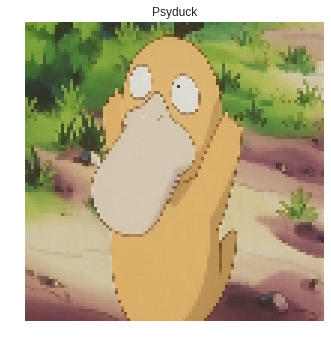

In [0]:
drawImg(X[100]/255.0,Y[100])

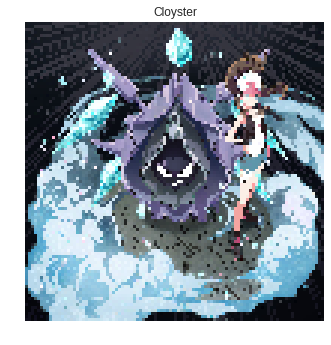

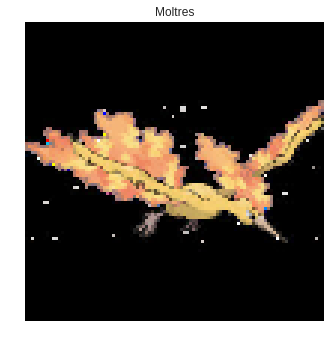

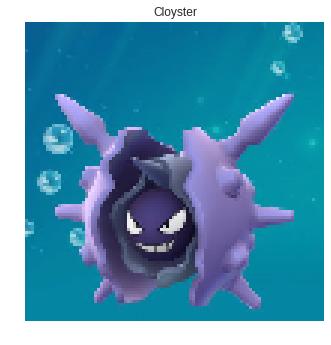

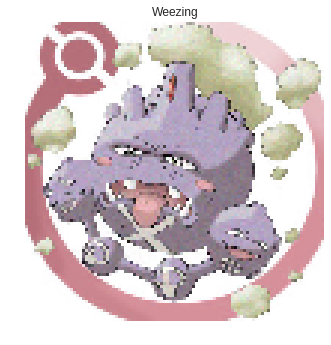

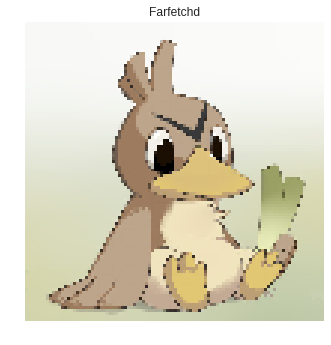

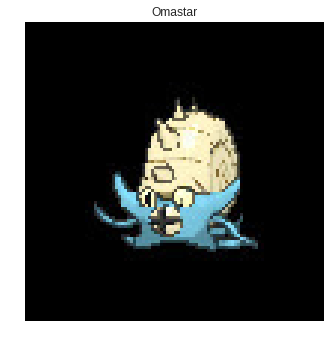

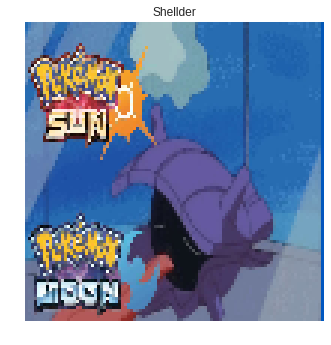

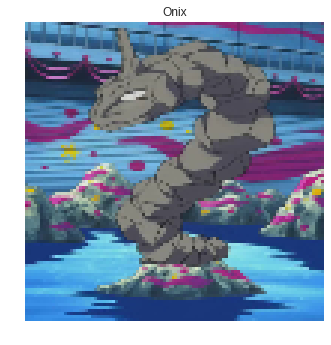

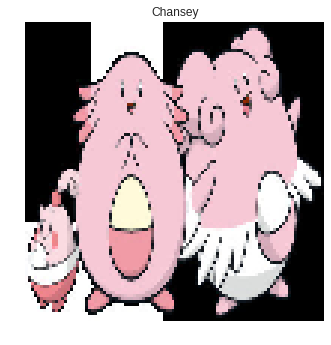

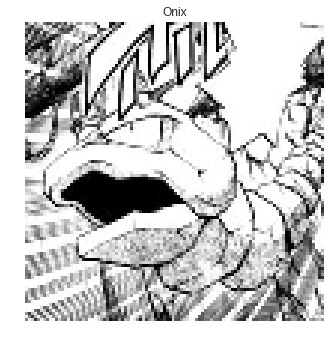

In [0]:
# Drawing 10 random pokemons

for i in range(10):
#     Random Index
    r = np.random.randint(6000)
    drawImg(X[r]/255.0,Y[r])

In [0]:
print(X.shape)
print(Y.shape)

(10118, 100, 100, 3)
(10118,)


In [0]:
X_train = X.reshape((-1,100,100,3))
Y_train = np_utils.to_categorical(Y)

print(X_train.shape,Y_train.shape)

(10118, 100, 100, 3) (10118, 151)


In [0]:
from keras.applications.resnet50 import ResNet50
from keras.layers import *

In [0]:
avl = GlobalAveragePooling2D()(res_model.output)
fcl = Dense(256,activation='relu')
dl = Dropout(0.25)(fcl)
out = Dense(4,activation='softmax')(d1)
t1_model(inputs=res_model.imput,outputs=out)
t1_model.summary()

NameError: ignored

In [0]:
model = Sequential()
model.add(Convolution2D(96,(3,3),activation='relu',input_shape=(100,100,3)))
model.add(Convolution2D(64,(3,3),activation='relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(32,(5,5),activation='relu'))
model.add(Convolution2D(8,(5,5),activation='relu'))
model.add(Flatten())
model.add(Dense(151,activation='softmax'))
model.summary()

W0724 09:39:42.300992 139824811763584 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0724 09:39:42.323716 139824811763584 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0724 09:39:42.329846 139824811763584 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0724 09:39:42.362867 139824811763584 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0724 09:39:42.375339 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 98, 98, 96)        2688      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 96, 96, 64)        55360     
_________________________________________________________________
dropout_1 (Dropout)          (None, 96, 96, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 44, 44, 32)        51232     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 40, 40, 8)         6408      
_________________________________________________________________
flatten_1 (Flatten)          (None, 12800)             0         
__________

In [0]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

W0724 09:40:32.030532 139824811763584 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0724 09:40:32.069005 139824811763584 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [0]:
hist = model.fit(X_train,Y_train,
                 epochs = 10,
                 shuffle = True,
                 batch_size = 256,
                 validation_split=0.20)

W0724 09:40:36.061851 139824811763584 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 8094 samples, validate on 2024 samples
Epoch 1/10
8094/8094 [==============================] - 1071s 132ms/step - loss: 16.0143 - acc: 0.0062 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 2/10
3072/8094 [==========>...................] - ETA: 10:29 - loss: 16.0132 - acc: 0.0065

KeyboardInterrupt: ignored